In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import  precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import unidecode

In [4]:
df = pd.read_csv('../big_clarin.csv')
stopwords = pd.read_csv('../stopwords.csv', header= None)


In [5]:
df.head()

,Unnamed: 0,articleBody,bajada,date,headline,section,volanta
0,0,Argentina XV ratificó la supremacía que ejerce...,"Cerró la temporada con una goleada, 82-7 a Uru...",2017-10-15 18:32:35.075360,Argentina XV se consagró bicampeón,Deportes,Rugby
1,1,En un informe de Transparencia Internacional -...,Un buen gobierno necesita participación activa...,2017-10-15 18:32:35.075360,De súbditos a ciudadanos,Opinión,Del editor al lector
2,2,Instituto ratificó su liderazgo en el Grupo B ...,Superaron a Quimsa y a Olímpico respectivamente.,2017-10-15 18:32:35.075360,Súper 20: ganaron Instituto y Atenas,Deportes,Básquet
3,3,"En un raid por dos programas de TV, el último ...",Estuvo en los programas de Jorge Lanata y Luis...,2017-10-15 18:32:35.075360,El raid televisivo de Elisa Carrió en el últim...,Política,Elecciones 2017
4,4,"A una semana exacta de las elecciones, la gobe...","La gobernadora criticó al kirchnerismo: ""Duran...",2017-10-15 18:32:35.075360,"María Eugenia Vidal: ""No se puede joder con lo...",Política,A una semana de las elecciones


In [6]:
stopwords_list = stopwords[0].values
stopwords_list = list(stopwords_list)

In [7]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [8]:
def text_stemmer(text):
    texto = text.lower()
    unaccented_string = unidecode.unidecode(texto)
    stripped = re.sub('[^a-z0-9]+', ' ', unaccented_string).lstrip()
    stemmed = " ".join([stemmer.stem(x) for x in stripped.split(' ')])
    return stemmed

In [9]:
#Esto tarda bastante
df['articleBody2'] = df["articleBody"].apply(text_stemmer)

In [10]:
df.head(5)

,Unnamed: 0,articleBody,bajada,date,headline,section,volanta,articleBody2
0,0,Argentina XV ratificó la supremacía que ejerce...,"Cerró la temporada con una goleada, 82-7 a Uru...",2017-10-15 18:32:35.075360,Argentina XV se consagró bicampeón,Deportes,Rugby,argentin xv ratif la supremaci que ejerc en el...
1,1,En un informe de Transparencia Internacional -...,Un buen gobierno necesita participación activa...,2017-10-15 18:32:35.075360,De súbditos a ciudadanos,Opinión,Del editor al lector,en un inform de transparent internacional cuy ...
2,2,Instituto ratificó su liderazgo en el Grupo B ...,Superaron a Quimsa y a Olímpico respectivamente.,2017-10-15 18:32:35.075360,Súper 20: ganaron Instituto y Atenas,Deportes,Básquet,institut ratif su liderazg en el grup b del su...
3,3,"En un raid por dos programas de TV, el último ...",Estuvo en los programas de Jorge Lanata y Luis...,2017-10-15 18:32:35.075360,El raid televisivo de Elisa Carrió en el últim...,Política,Elecciones 2017,en un raid por dos program de tv el ultim domi...
4,4,"A una semana exacta de las elecciones, la gobe...","La gobernadora criticó al kirchnerismo: ""Duran...",2017-10-15 18:32:35.075360,"María Eugenia Vidal: ""No se puede joder con lo...",Política,A una semana de las elecciones,a una seman exact de las eleccion la gobern bo...


In [11]:
df_sections = df[(df.section == 'Política') | (df.section == 'Economía')]
X = df_sections['articleBody2']
y = df_sections['section']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [13]:
#Vectorizar 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(strip_accents= 'ascii', stop_words= stopwords_list)
count_vect.fit(X_train)
X_train_counts = count_vect.transform(X_train)

X_train_counts.shape

(438, 11411)

In [12]:
#frecuencia por palabra
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#tfidf_transformer.fit(X_train_counts)
#X_train_tfidf = tfidf_transformer.transform(X_train_counts)

#X_train_tfidf.shape

In [14]:
X_test_counts = count_vect.transform(X_test)
#X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [15]:
list(map(lambda x : 1 if(x == "A") else 0,["A","B","A","A"]))

[1, 0, 1, 1]

In [16]:
def get_report(test_features,test_target,model, model_name):
    y_pred = model.predict_proba(test_features)
    y_pred_abs = model.predict(test_features)
    Ytest = list(map(lambda x : 1 if(x == "Política") else 0,test_target))
    fpr_log,tpr_log,thr_log = roc_curve(Ytest, y_pred[:,1])
    df_aux = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
    plt.axis([0, 1.01, 0, 1.01])
    plt.xlabel('1 - Specificty')
    plt.ylabel('TPR / Sensitivity')
    plt.title('ROC Curve')
    plt.plot(df_aux['fpr'],df_aux['tpr'])
    plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
    plt.show() 
    print("--------------REPORT MODEL {}--------------\n".format(model_name))
    print("Roc Auc: {}".format(roc_auc_score(Ytest,y_pred[:,1])))
    print("\n Classification Report: \n")
    print(classification_report(test_target,y_pred_abs))
    print("\n Classification Report: \n")
    print(confusion_matrix(test_target, y_pred_abs))
    print("-------------------------------------------\n")

### Multinomial Naive Bayes

In [17]:
model_multinb = MultinomialNB().fit(X_train_counts, y_train)
y_pred_multinb = model_multinb.predict(X_test_counts)

print('Accuracy Multi NB: ',accuracy_score(y_pred_multinb, y_test))

Accuracy Multi NB:  0.953917050691


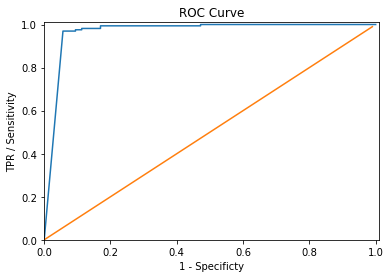

--------------REPORT MODEL Multinomial Naive Bayes--------------

Roc Auc: 0.9663483663138519

 Classification Report: 

             precision    recall  f1-score   support

   Economía       0.98      0.83      0.90        53
   Política       0.95      0.99      0.97       164

avg / total       0.96      0.95      0.95       217


 Classification Report: 

[[ 44   9]
 [  1 163]]
-------------------------------------------



In [99]:
get_report(X_test_counts,y_test,model_multinb,"Multinomial Naive Bayes")

In [100]:
df_results = pd.DataFrame(X_test)
df_results['Prediction'] = y_pred_multinb
df_results.head(5)

,articleBody2,Prediction
128,la person que realiz la amenaz de bomb que gen...,Política
1384,la cam de represent diput estadounidens aprob ...,Política
1958,el gobiern convirti las fronter nacional en un...,Política
1346,buen ahor vam a pas tod al salon de al lad a a...,Política
1990,la ultim cena31 de diciembr 13 30 hor la gent ...,Política


### KNN

In [101]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train_counts,y_train)
y_pred_knn = model_knn.predict(X_test_counts)
print('Accuracy KNN: ',accuracy_score(y_pred_knn, y_test))

Accuracy KNN:  0.820276497696


In [102]:
#CV
X_counts = count_vect.transform(X)
from sklearn.model_selection import cross_val_score
scores_para_df_standar = []
for i in range(1,100,5):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model_knn, X_counts, y, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [103]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
#df_scores_standar
df_scores_standar.sort_values(by="score_medio",ascending=False).head(5)

,n_neighbours,score_medio,score_std
3,16,0.838242,0.034554
2,11,0.829047,0.022562
4,21,0.826016,0.024679
5,26,0.819885,0.027143
1,6,0.803138,0.027305


In [104]:
model_knn = KNeighborsClassifier(n_neighbors=16)
model_knn.fit(X_train_counts,y_train)
y_pred_knn = model_knn.predict(X_test_counts)
print('Accuracy KNN: ',accuracy_score(y_pred_knn, y_test))

Accuracy KNN:  0.852534562212


In [105]:
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']

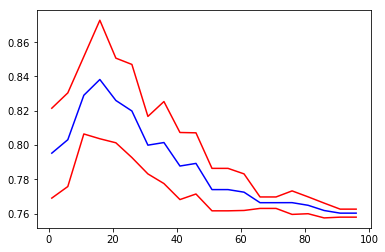

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

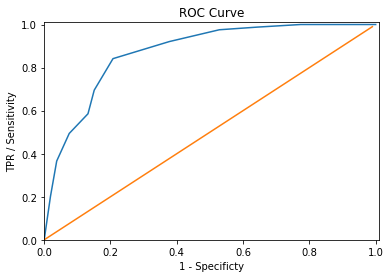

--------------REPORT MODEL KNN (n=16)--------------

Roc Auc: 0.8711458812701335

 Classification Report: 

             precision    recall  f1-score   support

   Economía       0.86      0.47      0.61        53
   Política       0.85      0.98      0.91       164

avg / total       0.85      0.85      0.84       217


 Classification Report: 

[[ 25  28]
 [  4 160]]
-------------------------------------------



In [107]:
get_report(X_test_counts,y_test,model_knn,"KNN (n=16)")

### SVM

In [108]:
svc_C = [1, 5, 10, 50]
svc_gamma = [0.0001, 0.0005, 0.001, 0.005]
for c in svc_C:
    for g in svc_gamma:
        model_svm = SVC(kernel='rbf', class_weight='balanced', C=c, gamma = g)
        print (np.mean(cross_val_score(model_svm,X_train_counts,y_train,cv=5)),' gamma:',g,' C:',c)

0.872040169133  gamma: 0.0001  C: 1
0.913319238901  gamma: 0.0005  C: 1
0.894926004228  gamma: 0.001  C: 1
0.762579281184  gamma: 0.005  C: 1
0.917917547569  gamma: 0.0001  C: 5
0.924577167019  gamma: 0.0005  C: 5
0.904069767442  gamma: 0.001  C: 5
0.762579281184  gamma: 0.005  C: 5
0.92700845666  gamma: 0.0001  C: 10
0.924524312896  gamma: 0.0005  C: 10
0.904069767442  gamma: 0.001  C: 10
0.762579281184  gamma: 0.005  C: 10
0.931501057082  gamma: 0.0001  C: 50
0.924524312896  gamma: 0.0005  C: 50
0.904069767442  gamma: 0.001  C: 50
0.762579281184  gamma: 0.005  C: 50


In [109]:
model_svm = SVC(kernel='rbf', class_weight='balanced', C=50, gamma = 0.0001)
model_svm.fit(X_train_counts,y_train)
y_pred_svm = model_svm.predict(X_test_counts)
print('Accuracy SVM: ',accuracy_score(y_pred_svm, y_test))

Accuracy SVM:  0.921658986175


In [ ]:
confusion = confusion_matrix(y_test, y_pred_svm)
print(confusion)

### Regresión Logística

In [110]:
model_log = LogisticRegression(C=0.1)
model_log.fit(X_train_counts, y_train)
y_pred_log = model_log.predict(X_test_counts)
print('Accuracy Logistic Regression: ',accuracy_score(y_pred_log, y_test))

Accuracy Logistic Regression:  0.917050691244


In [111]:
df_results = pd.DataFrame(X_test)
df_results['Prediction'] = y_pred_log
df_results.head(10)

,articleBody2,Prediction
128,la person que realiz la amenaz de bomb que gen...,Política
1384,la cam de represent diput estadounidens aprob ...,Política
1958,el gobiern convirti las fronter nacional en un...,Política
1346,buen ahor vam a pas tod al salon de al lad a a...,Política
1990,la ultim cena31 de diciembr 13 30 hor la gent ...,Política
942,ernest savagli el public que cubri de color y ...,Política
1430,la ucr hac equilibri en sant fe par evit quieb...,Política
1776,maurici macri celebr hoy su cumplean numer 58 ...,Política
633,la candidat a senador por el massism margarit ...,Política
336,la griet que se habi gener dentr de la cgt ent...,Política


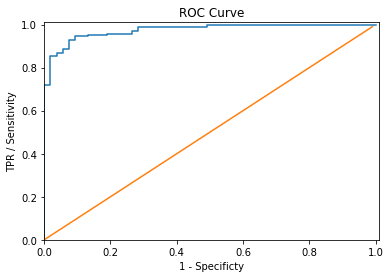

--------------REPORT MODEL Regresión Logística (c=0.1)--------------

Roc Auc: 0.9746893695352048

 Classification Report: 

             precision    recall  f1-score   support

   Economía       0.93      0.72      0.81        53
   Política       0.91      0.98      0.95       164

avg / total       0.92      0.92      0.91       217


 Classification Report: 

[[ 38  15]
 [  3 161]]
-------------------------------------------



In [112]:
get_report(X_test_counts,y_test,model_log,"Regresión Logística (c=0.1)")